## introduction to regression with neural networks in tensorflow
* there are many definations for regression problem but in our case, we are going to simplify it, predicting a number based on some other combination of variables

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.10.0


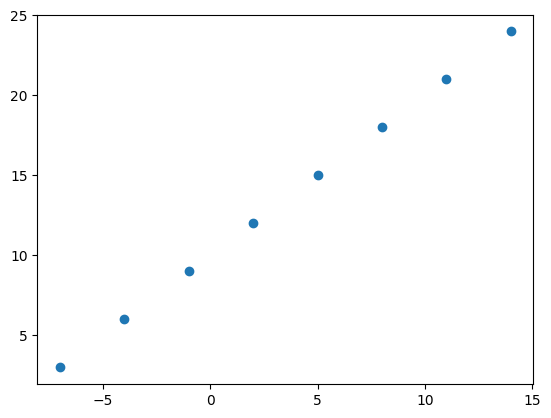

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X= np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create labels
y= np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)


In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price= tf.constant([939700])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
X[1],y[1]

(-4.0, 6.0)

In [7]:
input_shape= X[0].shape
output_shape=y[0].shape

input_shape,output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
#turn our numpy arrays into tensors

X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape,output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensor flow
1. **Create a model** -  define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function( in other words, the function will tells the error in our model) and the optimizer (tells our model how to improve the the patters it is learning) and evaluation matrix(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patters between X and y (features and labels)

In [11]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

'''model = tf.keras.Sequential([
])
model.add(tf.keras.layers.Dense(1))
'''

#compiling the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

'''
model.compile(loss="mae",
                optimizer="sgd",
                metrics=["mae"])
'''

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 598ms/step - loss: 15.7245 - mae: 15.7245
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 15.4433 - mae: 15.4433
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 15.1620 - mae: 15.1620
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 14.9093 - mae: 14.9093
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 14.7768 - mae: 14.7768


In [12]:
#try and predict using our model
model.predict([17.0])

1/1 [==============================] - 0s 172ms/step


array([[-5.7217307]], dtype=float32)

### Improving our model

we can improve our model by altering the steps we took to create a model

1. **Creating a model**- here we might add more layers increase the number of hidden units(all called neurons) within each of the hidden layers,change the activation function of each layer
2. **Compiling a model**-here we might change the optimization function or perheps the **learning rate** of the optimization function
3. **Fitting a model**- here we might fit a model for more **epochs** (give the model more examples to learn from)

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compiling the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
                
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 462ms/step - loss: 11.9873 - mae: 11.9873
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8548 - mae: 11.8548
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7223 - mae: 11.7223
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5898 - mae: 11.5898
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4573 - mae: 11.4573
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.3248 - mae: 11.3248
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1923 - mae: 11.1923
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0598 - mae: 11.0598
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9273 - mae: 10.9273
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7948 - mae: 10.7948
Epoch 11/100
1/1 [==============================] - 0s

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[29.60756]], dtype=float32)

In [15]:
# set random seed
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])


#compiling the model

model.compile(loss="mae",optimizer="sgd",metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 501ms/step - loss: 10.3282 - mae: 10.3282
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8600 - mae: 9.8600
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3555 - mae: 9.3555
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 8.8105 - mae: 8.8105
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2207 - mae: 8.2207
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5809 - mae: 7.5809
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8859 - mae: 6.8859
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.1296 - mae: 6.1296
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3054 - mae: 5.3054
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 4.4063 - mae: 4.4063
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 4.0

In [16]:
model.predict([17.0]) # even though the loss is less but still our predicted value is further away from what was predicted in last model
# this is due to overfitting

1/1 [==============================] - 0s 120ms/step


array([[31.755283]], dtype=float32)

In [17]:
# set random seed
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

#by increasing hidden layers loss is decreasing, but overfitting is increasing


#compiling the model

model.compile(loss="mae",optimizer="sgd",metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 530ms/step - loss: 14.7300 - mae: 14.7300
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 14.5469 - mae: 14.5469
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 14.3790 - mae: 14.3790
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 14.2239 - mae: 14.2239
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 14.0793 - mae: 14.0793
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.9433 - mae: 13.9433
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 13.8144 - mae: 13.8144
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.6910 - mae: 13.6910
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.5718 - mae: 13.5718
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.4563 - mae: 13.4563
Epoch 11/100
1/1 [==============================] - 0s 4m

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 125ms/step


array([[31.781101]], dtype=float32)

In [19]:
# set seed
tf.random.set_seed(42)

# create our model

model= tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

#compile our model
model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])

#fit your model

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


c:\Users\lupiv\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 531ms/step - loss: 8.7880 - mae: 8.7880
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7430 - mae: 8.7430
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6980 - mae: 8.6980
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6530 - mae: 8.6530
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6080 - mae: 8.6080
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5630 - mae: 8.5630
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.5180 - mae: 8.5180
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4730 - mae: 8.4730
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4280 - mae: 8.4280
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3830 - mae: 8.3830
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 8.338

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[31.459795]], dtype=float32)

In [21]:
tf.random.set_seed(42)
list=[tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(1)]

model = tf.keras.Sequential(list)

#compiling the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 579ms/step - loss: 13.9119 - mae: 13.9119
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3774 - mae: 13.3774
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8676 - mae: 12.8676
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3688 - mae: 12.3688
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8809 - mae: 11.8809
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3371 - mae: 11.3371
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7346 - mae: 10.7346
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0117 - mae: 10.0117
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1093 - mae: 9.1093
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.9501 - mae: 7.9501
Epoch 11/100
1/1 [==============================] - 0s 6ms/

In [22]:
model.predict([17.0])
# it is not necessary by that by increasing hyperparameter our error will be reduced

1/1 [==============================] - 0s 118ms/step


array([[31.609385]], dtype=float32)

### Evaluating a model

in practice, a typical workflow you'll go through when you are building neural networks is:

> Build a model ---> fit it ---> evaluate it ---> tweak a model ---> fit it ---> evaluate it ----> tweak it ---> fit it ---> evaluate it...

when it comes to evaluation ... there are 3 words you should remember:

>'Visualize,Visualize,Visualize,'

its a good idea to visualize:
* the data- what data are we working with? how does it look like.
* the model itself- what does our model look like?
* the training of a model -  how does a model perform while it learns?
* the predictions of the model- how does the predictions of the model line up against ground truth(the original labels)?

In [23]:
# make a bigger data set
X= tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [24]:
y= X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

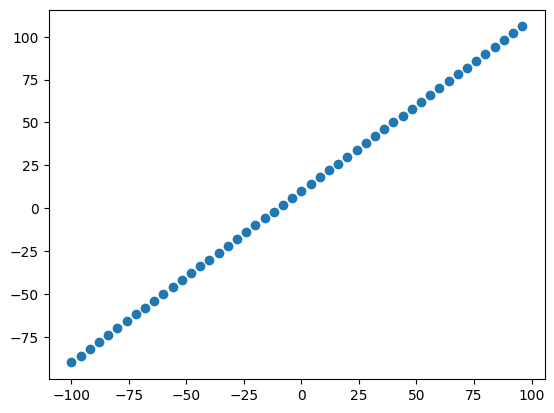

In [25]:
#visualize the data
plt.scatter(X,y)

#### The 3 set...
* **Training set**- the model learns from this data, which is typically 70-80% of the total data you have avaliable.
* **Validation set**-the model gets tuned on this data, which is typically 10-15% of the data avaliable.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data avaliable.

In [26]:
# check the length of how many samples we have

len(X)

50

In [27]:
# split the data into train and test set
X_train=X[:40] #first 40 are training samples(80% of the data)
y_train=y[:40]

X_test=X[40:] #  last 10 are testing samples(20% of the data)
y_test=y[40:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

#### Visualising the data
Now we've got our data in training and test sets .. let's visaulize it again!

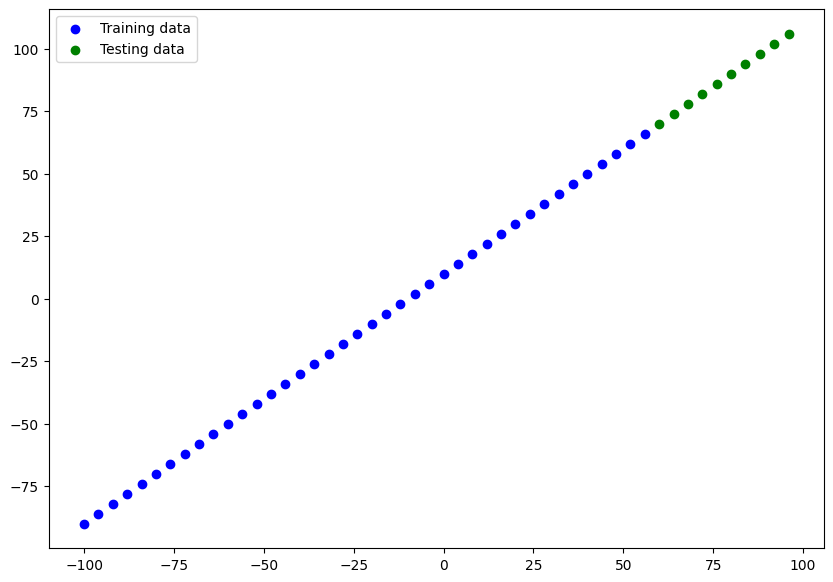

In [28]:
plt.figure(figsize=(10,7))

#plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data") #our model will learn on this

#plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data") # want our model to be able to predict this(given X, what's y?)

#show a legend
plt.legend()

In [29]:
#lets have a look at how to build a neural network for our data.

#create a model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)# dense means fully connected layer
])

# compiling our model
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

# fitting our model
# model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

# we can use model.build()
model.build(input_shape=[None,1])


#### Vsiaulizing the model

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [31]:
#lets create a model which builds automatically by defining the input_shape arguement 
tf.random.set_seed(42)

#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# compiling our model

model.compile(loss='mae',optimizer='sgd',metrics=['mae'])

In [32]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parametes = these are parameters(patters) the model can update as it trains
* Non- trainable prarams - these parameters arent updated during training(this is typical when you bring in already learned patters and parameters from other models during **Transfer learning**.

for more info on trainable parameters , check out MIT's introduction to deep learning.

try playing around with the number of hidden units in dense layer, see how that effects the totl number of parameters(total and trainable) by calling model.summary().

In [33]:
#lets create a model which builds automatically by defining the input_shape arguement 
tf.random.set_seed(42)

#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# compiling our model

model.compile(loss='mae',optimizer='sgd',metrics=['mae'])

In [34]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [35]:
#lets fir our model to the traing data
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100,verbose=1)

#verbose can be 0,1,2 by default it is 1

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 33.7380 - mae: 33.7380
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 27.6569 - mae: 27.6569
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 23.3703 - mae: 23.3703
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 19.1932 - mae: 19.1932
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.5427 - mae: 15.5427
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.4913 - mae: 11.4913
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 9.1946 - mae: 9.1946
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.7453 - mae: 7.7453
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7849 - mae: 8.7849
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6113 - mae: 8.6113
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

In [36]:
import pydot
from tensorflow.keras.utils import plot_model



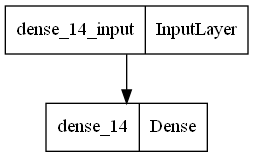

In [37]:
plot_model(model=model)

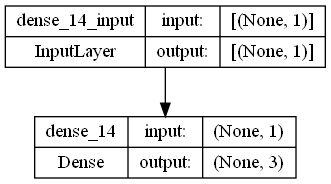

In [38]:
plot_model(model=model,show_shapes=True)

In [39]:
tf.random.set_seed(42)

#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# compiling our model

model.compile(loss='mae',optimizer='sgd',metrics=['mae'])

#lets fir our model to the traing data
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 50.6465 - mae: 50.6465
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 24.9371 - mae: 24.9371
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 18.0285 - mae: 18.0285
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.2128 - mae: 13.2128
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.5370 - mae: 14.5370
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.5862 - mae: 11.5862
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6320 - mae: 12.6320
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0199 - mae: 11.0199
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 39.5371 - mae: 39.5371
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.0501 - mae: 27.0501
Epoch 11/100
2/2 [==============================] - 0s 9ms

In [40]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 10        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


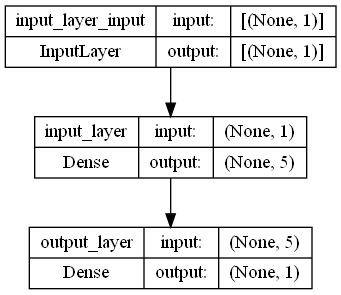

In [41]:
plot_model(model=model,show_shapes=True)

### Visualizing the prediction
* To visualize predictions, it's good idea to plot them against the ground truth labels.
* often you'll see this in form of y_test or y_true versus y_pred(ground truth versus your model's prediction)

In [42]:
#make some predictions
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 70ms/step


array([[ 81.62511 ],
       [ 86.95203 ],
       [ 92.27894 ],
       [ 97.60585 ],
       [102.93276 ],
       [108.25968 ],
       [113.586586],
       [118.9135  ],
       [124.24041 ],
       [129.56732 ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note**: if you feel like you are going to reuse some kind of functionality in future, its a good idea to turn it into functions. 

In [46]:
#lets create a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
    '''plot training data, test data and compare predictions to ground truth labels'''
    plt.figure(figsize=(10,7))
    #plot training data in blue
    plt.scatter(train_data, train_labels,c='b',label='training data')
    #plot testing data in green
    plt.scatter(test_data, test_labels,c='g',label='test data')
    #plot model's predictions in red
    plt.scatter(test_data, predictions,c='r',label='predictions')
    #show legends()
    plt.legend()

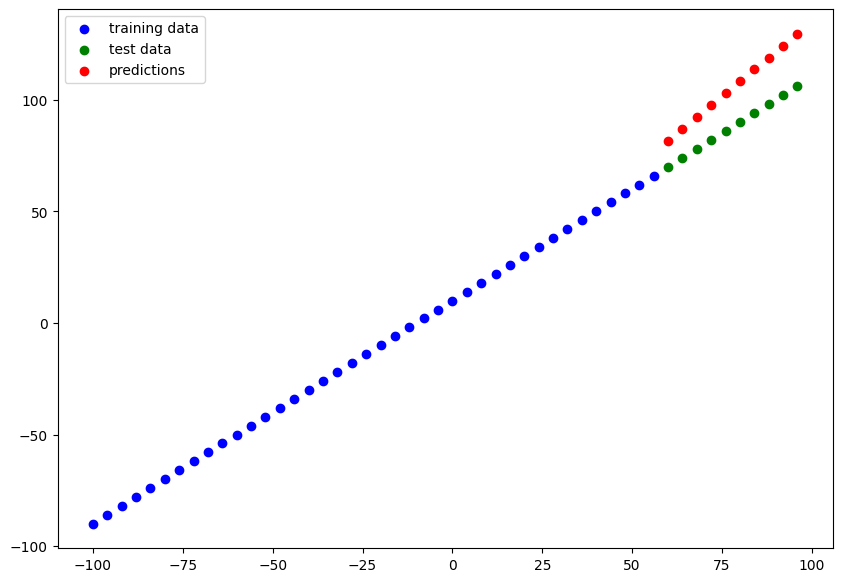

In [47]:
plot_predictions()

### Evaluating our models prediction with regression evaluation metrics
* Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance. 

* Since we are working on a regression, two of the main metrics:
    1. MAE- mean absolute error, "on average , how wrong is each of my model's prediction
    2. MSE= mean squared error,"square the averageerrors"

In [48]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 17.5962 - mae: 17.5962


[17.59621810913086, 17.59621810913086]